In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

there are 768 rows and 9 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


BMI & DiabetesPedigreeFunction are continous variables remaining  all are discrete variables.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
for i in df.select_dtypes(include='int64'):
    print('no of observations in each catagory of',i,' \n',df[i].value_counts())
    print('percentage of  observations in each catagory of',i,' \n',df[i].value_counts(normalize=True)**100)
    

no of observations in each catagory of Pregnancies  
 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
percentage of  observations in each catagory of Pregnancies  
 1      3.142352e-76
0      9.912333e-85
2      5.592429e-88
3     9.332636e-102
4     5.185245e-106
5     1.125547e-113
6     2.295506e-119
7     6.097185e-124
8     2.768456e-131
9     1.512450e-144
10    3.054936e-151
11    4.010020e-185
13    2.909900e-189
12    7.729100e-194
14    3.688736e-259
15    2.909900e-289
17    2.909900e-289
Name: Pregnancies, dtype: float64
no of observations in each catagory of Glucose  
 100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
percentage of  observations in each catagory of Glucose  
 100    3.226786e-166
99     3.226786e-166
129  

## checking null values

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

# checking duplicate values

In [9]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
there are no duplicate values too.

## check for outliers

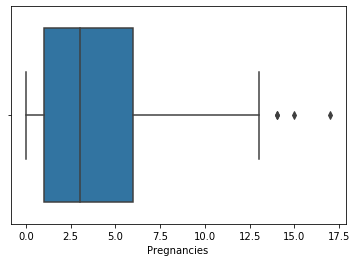

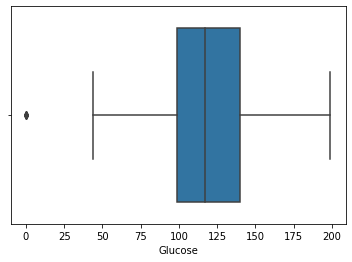

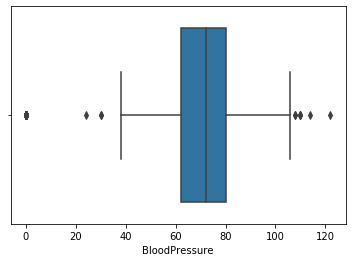

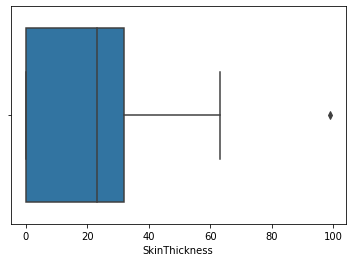

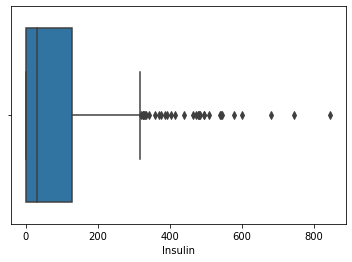

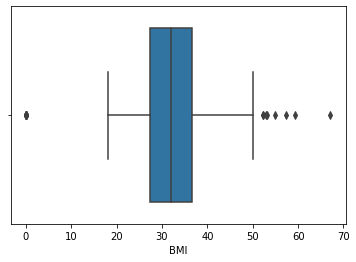

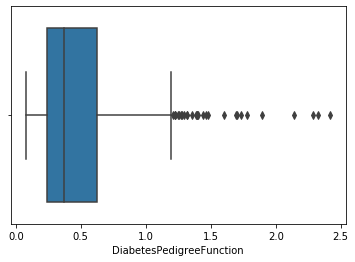

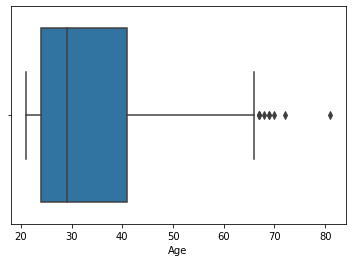

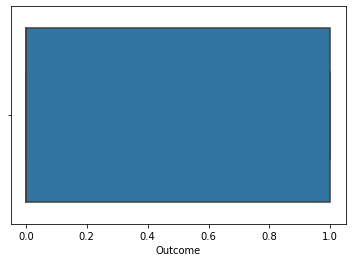

In [19]:
for i in df.select_dtypes(include=['int64','float64']):
    sns.boxplot(df[i])
    plt.show()


There are more outliers in Insulin and Diabetic boold pressure and a very few outliers in all others.

In [20]:
df.Outcome.value_counts(normalize= True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

we have 65:34 ratio which is way imbalanced but not a severe imbalanced dataset.

## 2. Data Preparation (10 marks) 

a.Fix the defects found above and do appropriate treatment if any. (3 marks) 

 The defect that found areoutliers, which can be treated pending on the bussiness domain knowledge, so we need to confirm with domain expert before treating outliers , to know whether the outlier we feel is reall anoutlier or not.

In [26]:
for i in df.select_dtypes(include=['int64','float64']):
    q1 =df[i].quantile(0.25)
    q3 =df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 -1.5*iqr
    df =df[(df[i]<=ul) & (df[i]>=ll)]

In [29]:
from sklearn.impute import KNNImputer
knimpute =KNNImputer()
knafterimpute =knimpute.fit_transform(df)

In [33]:
df1 =pd.DataFrame(knafterimpute,columns= df.columns)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0


we used knn imputer to treat the outliers.

In [ ]:
b. Visualize the data using relevant plots. Find out the variables which are highly correlated with Target? (3 marks) 

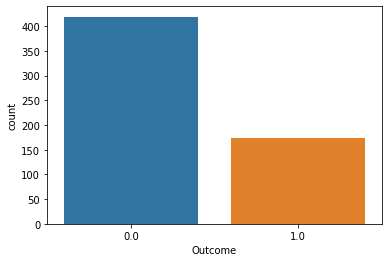

In [34]:
sns.countplot(df1.Outcome)

In [ ]:
we can see the count of target variable.

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               592 non-null    float64
 1   Glucose                   592 non-null    float64
 2   BloodPressure             592 non-null    float64
 3   SkinThickness             592 non-null    float64
 4   Insulin                   592 non-null    float64
 5   BMI                       592 non-null    float64
 6   DiabetesPedigreeFunction  592 non-null    float64
 7   Age                       592 non-null    float64
 8   Outcome                   592 non-null    float64
dtypes: float64(9)
memory usage: 41.8 KB


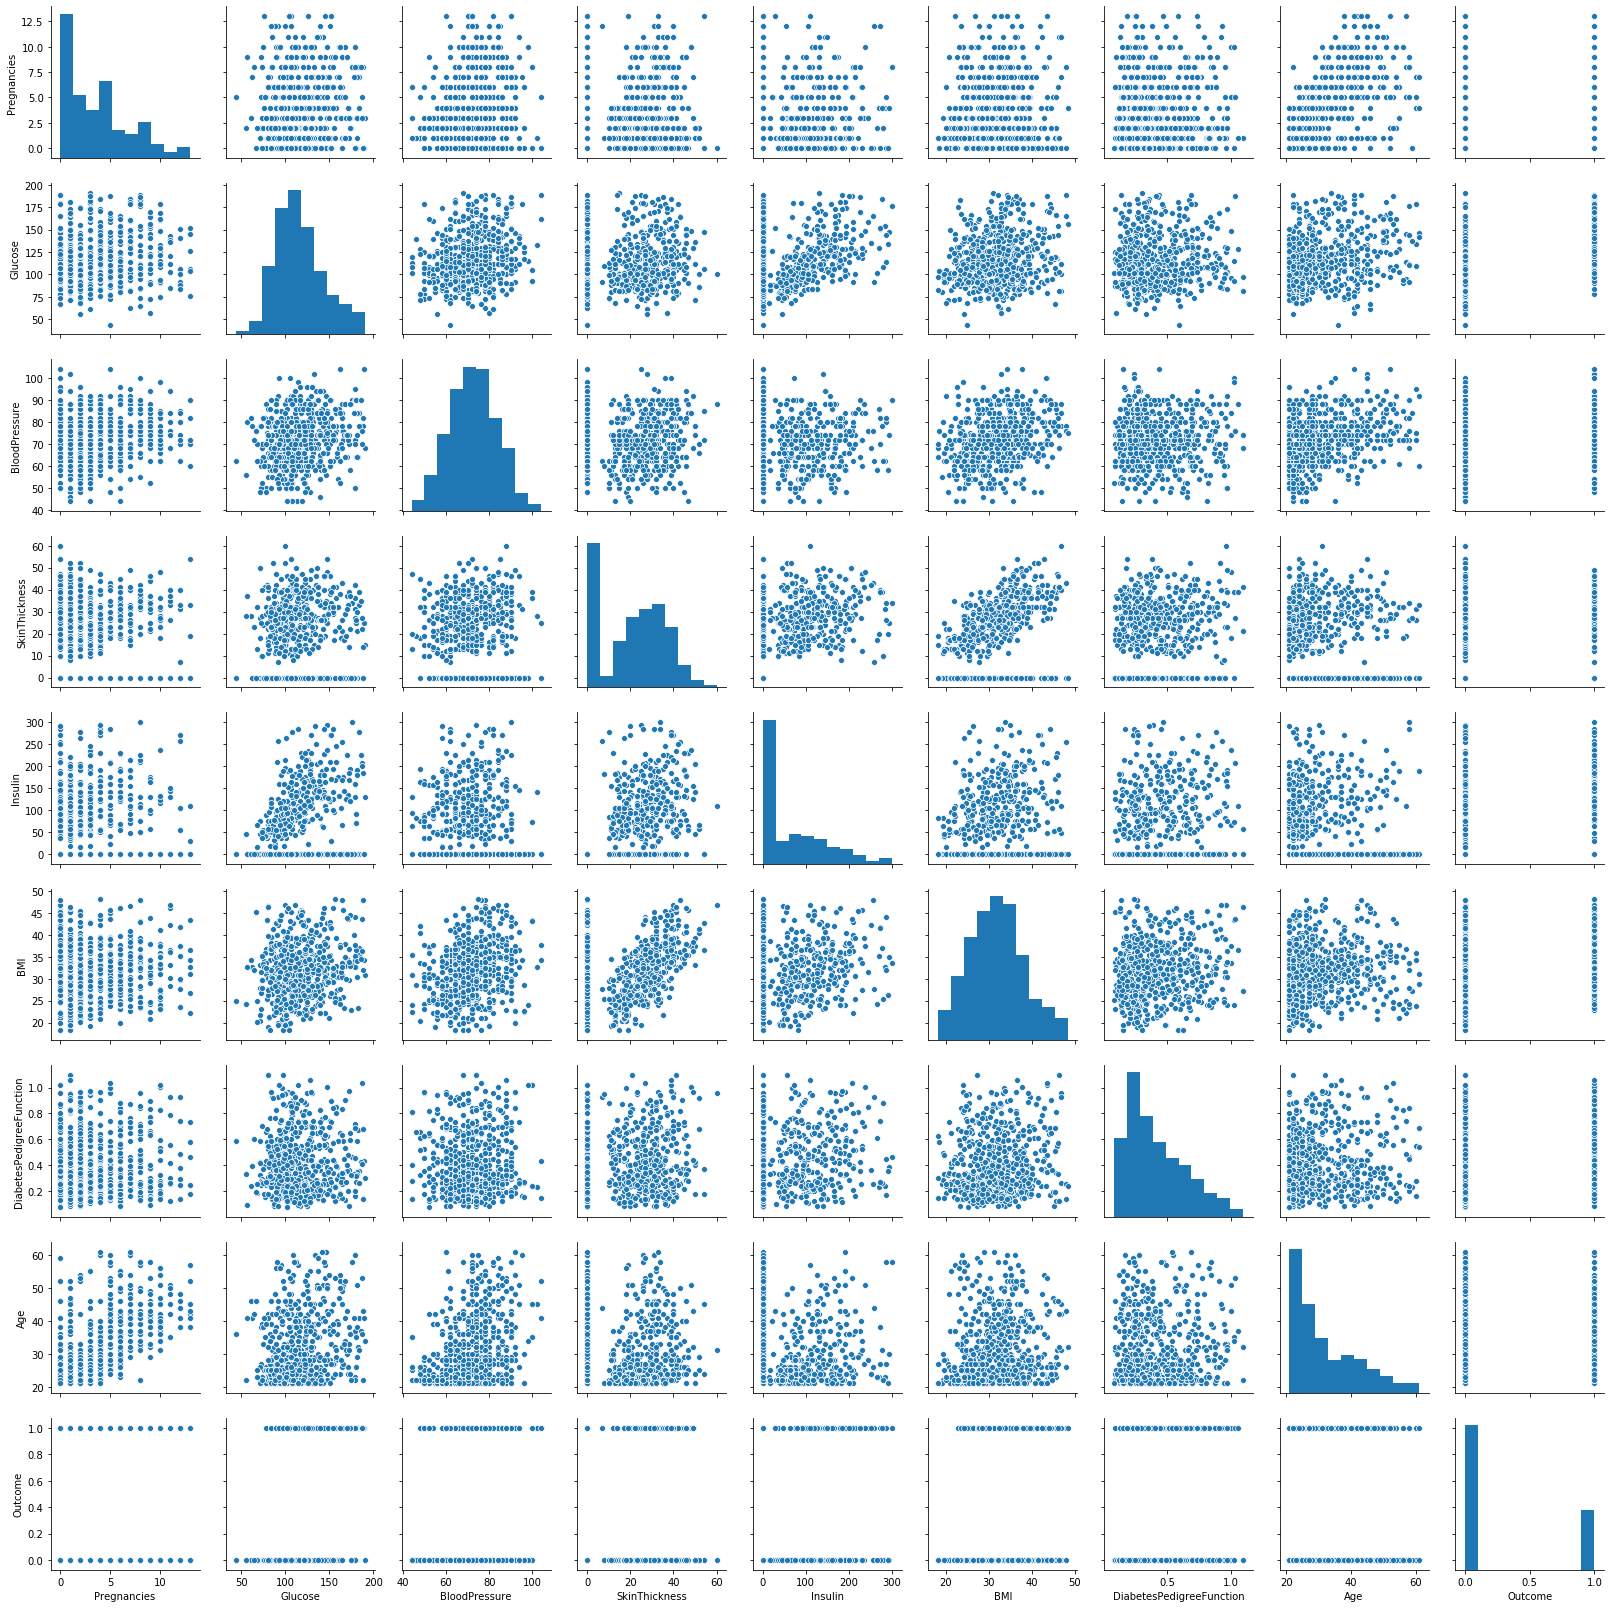

In [36]:
sns.pairplot(df1)
plt.show()

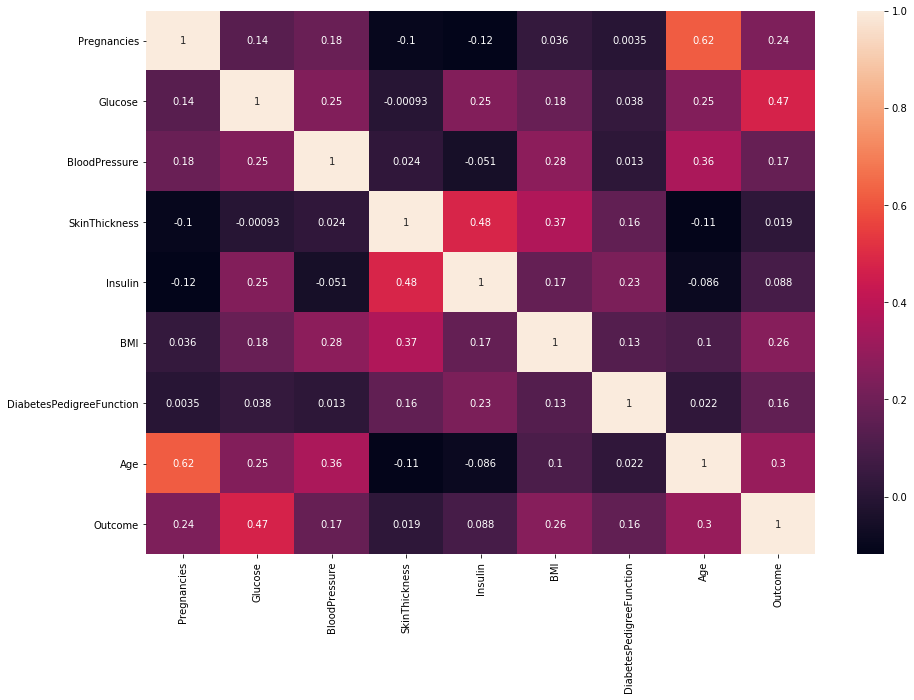

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

In [ ]:
we can see there is no such correlation between the variables, only age and pregnancies are much correlated in positive direction.

# multicollinearity test 

In [40]:
x1 = df1.drop(columns='Outcome')
y1 = df1.Outcome

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vifff = pd.DataFrame()

vifff['factors'] =[vif(x1.values,i) for i in range(x1.shape[1])]
vifff["features"] = x1.columns
vifff

,factors,features
0,3.802403,Pregnancies
1,22.228623,Glucose
2,39.136262,BloodPressure
3,4.370883,SkinThickness
4,2.609214,Insulin
5,30.371518,BMI
6,4.442517,DiabetesPedigreeFunction
7,20.319811,Age


we can see there is some multicollinearity  for BloodPressure,BMI,Glucose,Age

c.Do you want to exclude some variables from the model based on this analysis? What other actions will you take? (2 marks) 

we cant just simply exclude the variables by seeing multicollinearity as they is no such great multicollinearity. 

## Applying PCA

In [43]:
x = df1.drop(columns='Outcome')
y = df1.Outcome

In [44]:
from sklearn.preprocessing import StandardScaler
st =StandardScaler()
xscaled =st.fit_transform(x)


# covariance matrix

In [45]:
cov_matrix = np.cov(xscaled.T)
print('Covariance Matrix \n%s', cov_matrix)
plt.tight_layout()

Covariance Matrix 
%s [[ 1.00169205e+00  1.38615589e-01  1.83787098e-01 -1.00672080e-01
  -1.18846618e-01  3.60623559e-02  3.52446379e-03  6.20775878e-01]
 [ 1.38615589e-01  1.00169205e+00  2.47813578e-01 -9.31447274e-04
   2.51680232e-01  1.82288941e-01  3.83454816e-02  2.48923439e-01]
 [ 1.83787098e-01  2.47813578e-01  1.00169205e+00  2.35860619e-02
  -5.12167859e-02  2.77080512e-01  1.29396448e-02  3.56202375e-01]
 [-1.00672080e-01 -9.31447274e-04  2.35860619e-02  1.00169205e+00
   4.81765153e-01  3.68019330e-01  1.64043354e-01 -1.14227400e-01]
 [-1.18846618e-01  2.51680232e-01 -5.12167859e-02  4.81765153e-01
   1.00169205e+00  1.72266887e-01  2.31805120e-01 -8.58997732e-02]
 [ 3.60623559e-02  1.82288941e-01  2.77080512e-01  3.68019330e-01
   1.72266887e-01  1.00169205e+00  1.29102449e-01  1.01228801e-01]
 [ 3.52446379e-03  3.83454816e-02  1.29396448e-02  1.64043354e-01
   2.31805120e-01  1.29102449e-01  1.00169205e+00  2.24013708e-02]
 [ 6.20775878e-01  2.48923439e-01  3.56202375e-

<Figure size 432x288 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

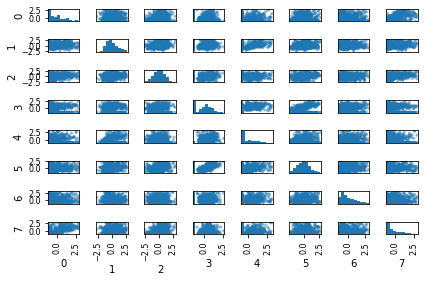

In [46]:
dffpiar =pd.DataFrame(xscaled)
plt.figure(figsize=(20,8))
axes =pd.plotting.scatter_matrix(dffpiar)
plt.tight_layout()

# Step 3: Calculate the eigenvalues and eigenvectors

In [47]:
eig_val ,eigvect = np.linalg.eig(cov_matrix)

In [48]:
print('Eigen Vectors \n%s', eig_val)
print('\n Eigen Values \n%s', eigvect)

Eigen Vectors 
%s [2.02492202 1.89175993 0.34521007 0.38912597 0.60633092 0.83046326
 0.99462029 0.93110392]

 Eigen Values 
%s [[ 0.46369157  0.28220009  0.61185361  0.14823167 -0.10944776 -0.37489675
   0.35897044  0.16622155]
 [ 0.38795582 -0.12135187 -0.02975894  0.38233471 -0.28208122  0.17019789
  -0.07025662 -0.75777665]
 [ 0.45398901  0.02448203  0.22123315 -0.00639534  0.62345275  0.36873443
  -0.45567946  0.10957836]
 [ 0.07293559 -0.56564213 -0.20012035  0.58652943  0.21704337 -0.41682565
  -0.04067388  0.26107211]
 [ 0.08381712 -0.55107789  0.1815089  -0.58073412  0.27677576 -0.24085773
   0.24995944 -0.34927532]
 [ 0.31655745 -0.36107995  0.05618695 -0.29359247 -0.62348246  0.03891343
  -0.41037832  0.34843096]
 [ 0.10458688 -0.29760948 -0.0069221   0.10830206 -0.04493274  0.65918531
   0.6186383   0.26354386]
 [ 0.55216161  0.24989891 -0.70682879 -0.22937277  0.07277402 -0.16347609
   0.20809292  0.071597  ]]


# variance

In [49]:
tot = sum(eig_val)
var_exp = [( i /tot ) * 100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 25.26876932  48.87582413  61.28757653  72.90671546  83.26997112
  90.83630498  95.69216322 100.        ]


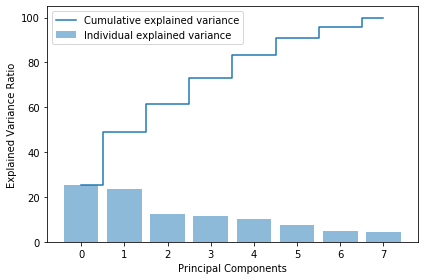

In [50]:
plt.figure(figsize=(6 , 4))
plt.bar(range(8), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(8), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

so, if we need to restore 80 percent of data , we need to take 4 PC's.

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (2 marks) SECTION 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.decomposition import PCA

pca =PCA()
xtrainpca = pca.fit_transform(X_train)
xtestpca = pca.transform(X_test)

so, we have two outcomes which are discrete, so we go with classification.

## 3. Model Building (15 marks) 

a. Fit a base model and explain the reason of selecting that model. Please write your key observations. (3 marks) 

In [59]:
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(xtrainpca,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
I took Decision Tree as the no. of rows are very less we can use the decision tree by overriding  risk of computational time. 

In [62]:
def evaluation_train_test(model,X_train,y_train,X_test,y_test):
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_train_pred = model.predict(X_train)
    y_test_prob = model.predict_proba(X_test)[:,1]
    y_test_pred = model.predict(X_test)
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
    print('Train accuracy score for train of',model,':',accuracy_score(y_train,y_train_pred))
    print('Test accuracy score for test of ',model,':',accuracy_score(y_test,y_test_pred))
    
    print('rou_auc_score for train',roc_auc_score(y_train,y_train_prob))
    print('rou_auc_score for test',roc_auc_score(y_test,y_test_prob))
    print('Train classification report \n',classification_report(y_train,y_train_pred))
    print('Test classification report \n',classification_report(y_test,y_test_pred))

    
    fig,axes =plt.subplots(1,2,figsize =(15,5))
    sns.heatmap(confusion_matrix(y_train,y_train_pred),annot =True,fmt ='g',ax =axes[0])
    #plt.show()
    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot =True,fmt ='g',ax =axes[1])
    plt.show()
    
    def roc_curves(y_true,y_true_prob):
          
          fpr, tpr, thresholds  =roc_curve(y_true,y_true_prob)
          thresholds[0] = thresholds[0]-1
          plt.plot(fpr,tpr)
          plt.plot(fpr,fpr)
          plt.plot(fpr,thresholds)
          plt.show();
    print('roc curve for Train')
    roc_curves(y_train,y_train_prob)
    print('roc curve for Test')
    roc_curves(y_test,y_test_prob)


Train accuracy score for train of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 1.0
Test accuracy score for test of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.6785714285714286
rou_auc_score for train 1.0
rou_auc_score for test 0

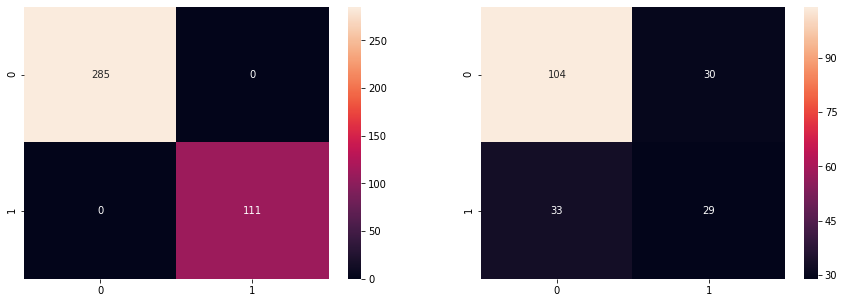

roc curve for Train


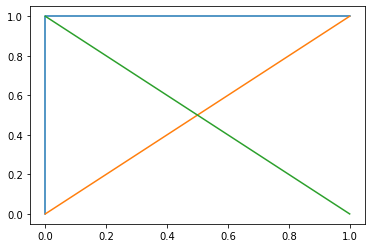

roc curve for Test


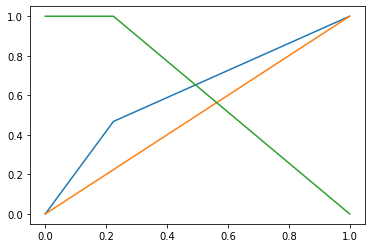

In [63]:
evaluation_train_test(dt,xtrainpca,y_train,xtestpca,y_test)


In [ ]:
b. What is the overall Accuracy? Please comment on whether it is good or not.  (2 mark) 
c. Evaluate the model built using Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement. (3 marks) 

In [ ]:
the accuracy of train is 1  and test accuracy is 0.67,, which is not good as the model is overfitted, in decision tree 

In [ ]:
to optimise the model we need to make sure the model is not getting overfitted.
As usual the decision tree is getting overfitted.so, we can stop the tree to grow too much , using Random search hypertuning.

Train accuracy score for train of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=31, min_samples_split=31,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.73989898989899
Test accuracy score for test of  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=31, min_samples_split=31,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') : 0.6224489795918368
rou_auc_score for train 0.788288288288288

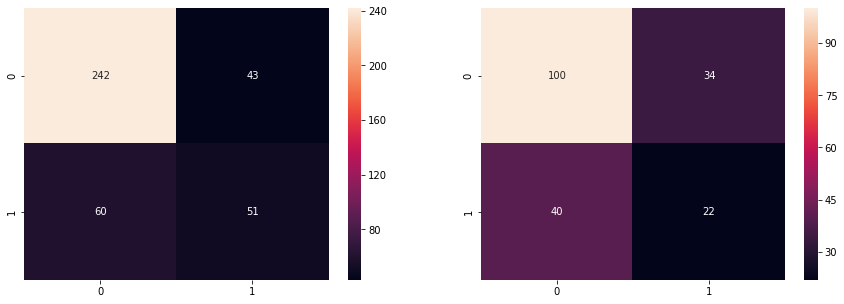

roc curve for Train


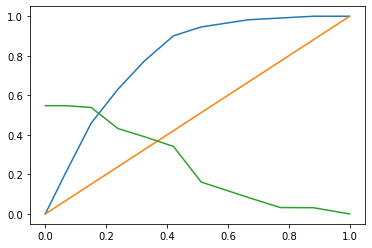

roc curve for Test


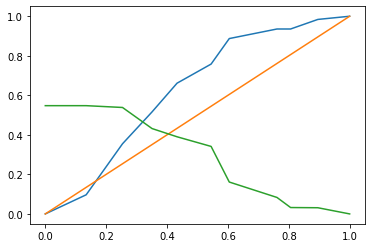

Wall time: 9.9 s


In [65]:
%%time
dt1 =DecisionTreeClassifier()
#modelt =rfctun.fit(X_train,y_train)

from scipy.stats import randint
param_dist = {
              "criterion": ["gini", "entropy"],
              "max_depth": randint(2,10),
              "min_samples_split" :randint(2, 100),
              "min_samples_leaf": randint(1, 100),
              'max_features' : randint(1,15),
              }
from sklearn.model_selection import RandomizedSearchCV
rsearchd = RandomizedSearchCV(dt1, param_dist, random_state=0,cv =10,n_iter=100,scoring ='roc_auc',n_jobs =-1)
rsearchd.fit(x, y)
rsearchd.best_params_
dt2 =DecisionTreeClassifier(**rsearchd.best_params_)

dt2.fit(xtrainpca,y_train)

evaluation_train_test(dt2,xtrainpca,y_train,xtestpca,y_test)


In [ ]:
It reduced the overfitting by hypertuning ,but still the model performance is not improved, so , we need to do hypertuning on all other hyper parameters.

## Lets check all other models 

# Random forest

Train accuracy score for train of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 1.0
Test accuracy score for test of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_w

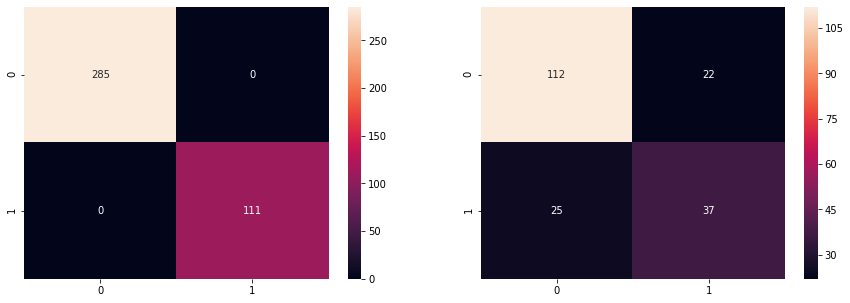

roc curve for Train


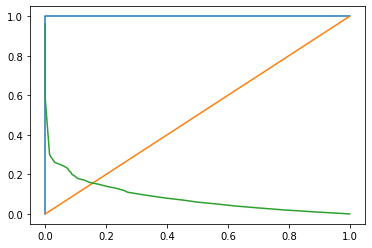

roc curve for Test


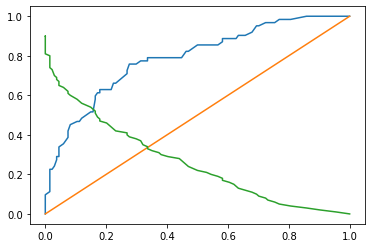

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
evaluation_train_test(rf,X_train,y_train,X_test,y_test)

#evaluation_train_test(rf,xtrainpca,y_train,xtestpca,y_test)

Train accuracy score for train of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=38,
                       min_weight_fraction_leaf=0.0, n_estimators=92,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 0.8232323232323232
Test accuracy score for test of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=38,
                    

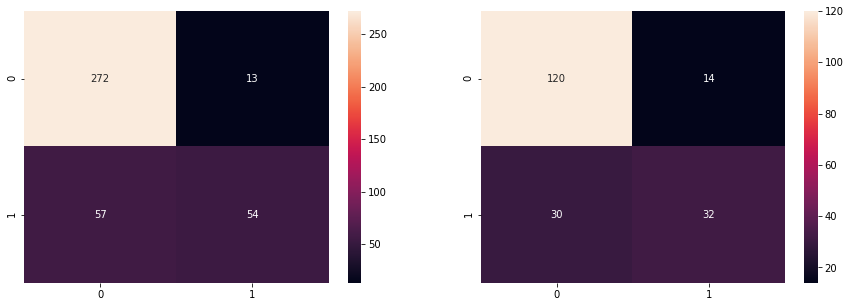

roc curve for Train


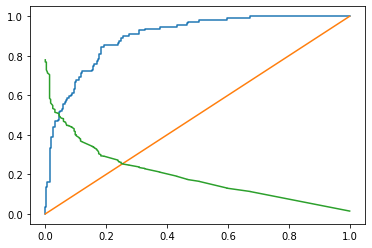

roc curve for Test


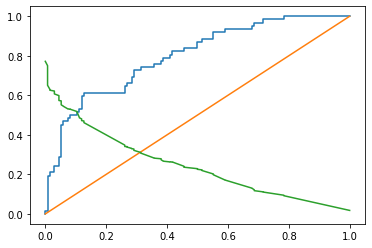

Wall time: 1min 32s


In [105]:
%%time

rfctun = RandomForestClassifier(n_jobs =-1)
#modelt =rfctun.fit(X_train,y_train)

from scipy.stats import randint
param_dist = { 'n_estimators': randint(5,100),
              "criterion": ["gini", "entropy"],
              "max_depth": randint(2,10),
              "min_samples_split" :randint(2, 100),
              "min_samples_leaf": randint(1, 100),
              'max_features' : randint(1,15),
              }
rsearch = RandomizedSearchCV(rfctun, param_dist, random_state=0,cv =10,n_iter=100,scoring ='roc_auc',n_jobs =-1)
rsearch.fit(xtrainpca,y_train)
rsearch.best_params_
rf1 =RandomForestClassifier(**rsearch.best_params_)
rf1.fit(X_train,y_train)
evaluation_train_test(rf1,X_train,y_train,X_test,y_test)


In [ ]:
So, by using the Random forest our model performance has improved a lot when compared to decision Tree.
the auc-roc_score for train is 90 and test is 80.

## light GBM

In [69]:
import lightgbm as lgb

In [70]:
lgbc = lgb.LGBMClassifier()

In [71]:
lgbc.fit(xtrainpca,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Train accuracy score for train of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 1.0
Test accuracy score for test of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) : 0.72959

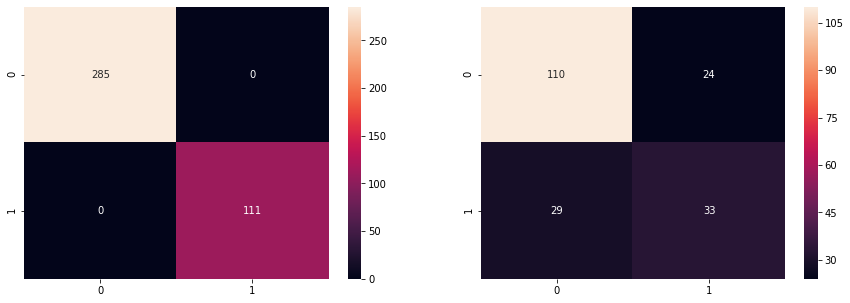

roc curve for Train


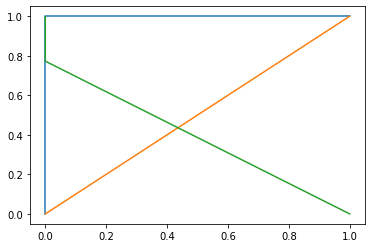

roc curve for Test


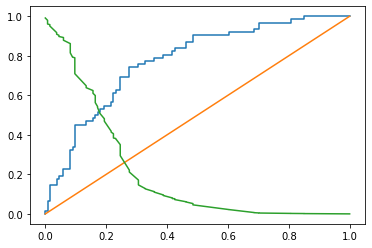

In [72]:


evaluation_train_test(lgbc,xtrainpca,y_train,xtestpca,y_test)

In [73]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint
from scipy.stats import uniform
param ={
    'num_leaves':randint(10,50),
    'max_depth':randint(2,15),
    'learning_rate':uniform(0,1),
    'n_estimators':randint(50,200),
    'min_child_samples':randint(2,50)
}
rsearch_lg = RandomizedSearchCV(lgbc,param,cv =3,scoring ='roc_auc',n_jobs=-1,n_iter=200,random_state=1)
rsearch_lg.fit(x,y)
rsearch_lg.best_params_

{'learning_rate': 0.026627884691621473,
 'max_depth': 12,
 'min_child_samples': 30,
 'n_estimators': 58,
 'num_leaves': 22}

In [74]:
lgbcr = lgb.LGBMClassifier(**rsearch_lg.best_params_)

In [76]:
lgbcr.fit(xtrainpca,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.026627884691621473,
               max_depth=12, min_child_samples=30, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=58, n_jobs=-1, num_leaves=22,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

Train accuracy score for train of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.026627884691621473,
               max_depth=12, min_child_samples=30, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=58, n_jobs=-1, num_leaves=22,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0) : 0.8585858585858586
Test accuracy score for test of  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.026627884691621473,
               max_depth=12, min_child_samples=30, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=58, n_jobs=-1, num_leaves=22,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsam

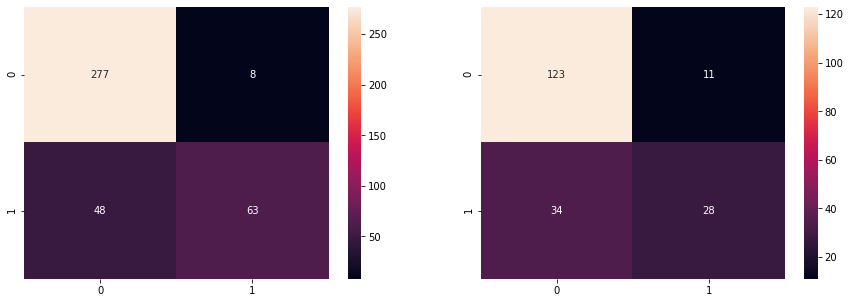

roc curve for Train


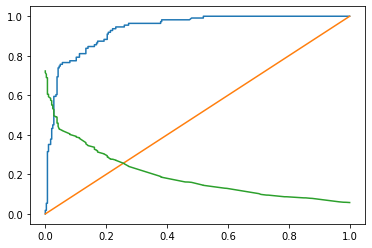

roc curve for Test


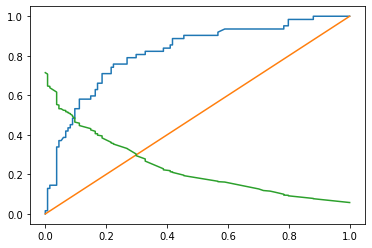

In [77]:
evaluation_train_test(lgbcr,xtrainpca,y_train,xtestpca,y_test)

In [ ]:
The auc-roc-score for lgbm  for train is 90 and for ttest is 82, which is better than other models.

## KNN model

In [78]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X_traink =ss.fit_transform(X_train)
X_testk =ss.transform(X_test)

Train accuracy score for train of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform') : 0.7777777777777778
Test accuracy score for test of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform') : 0.7346938775510204
rou_auc_score for train 0.8447289394657815
rou_auc_score for test 0.7921882522869523
Train classification report 
               precision    recall  f1-score   support

         0.0       0.77      0.98      0.86       285
         1.0       0.81      0.27      0.41       111

    accuracy                           0.78       396
   macro avg       0.79      0.62      0.63       396
weighted avg       0.78      0.78      0.73       396

Test classification report 
               precision    recall  f1-score 

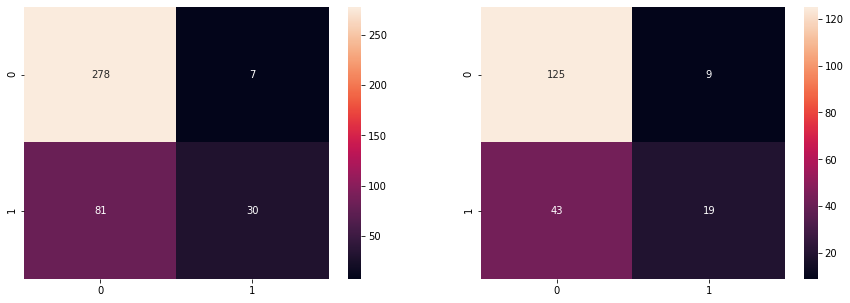

roc curve for Train


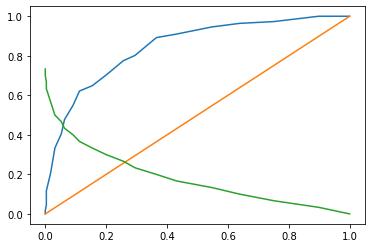

roc curve for Test


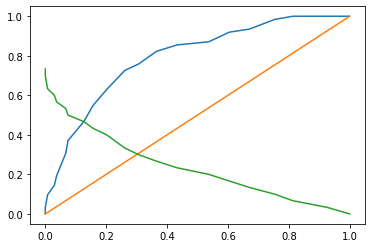

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=30)
knn.fit(X_traink,y_train)
evaluation_train_test(knn,X_train,y_train,X_testk,y_test)
#evaluation_train_test(knn,xtrainpca,y_train,xtestpca,y_test)

Train accuracy score for train of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=1,
                     weights='uniform') : 0.7777777777777778
Test accuracy score for test of  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=36, p=1,
                     weights='uniform') : 0.7346938775510204
rou_auc_score for train 0.8453769559032717
rou_auc_score for test 0.8186085700529611
Train classification report 
               precision    recall  f1-score   support

         0.0       0.77      0.98      0.86       285
         1.0       0.85      0.25      0.39       111

    accuracy                           0.78       396
   macro avg       0.81      0.62      0.63       396
weighted avg       0.79      0.78      0.73       396

Test classification report 
               precision    recall  f1-score 

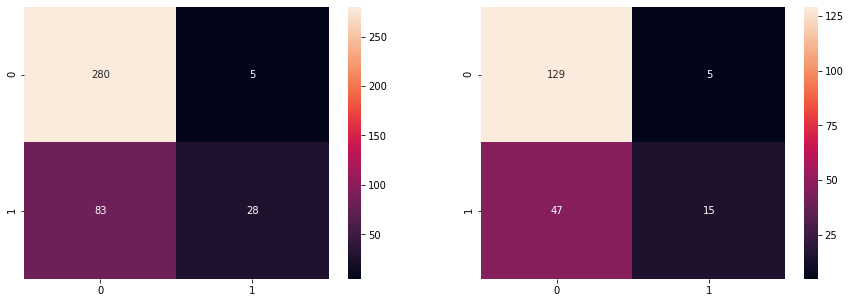

roc curve for Train


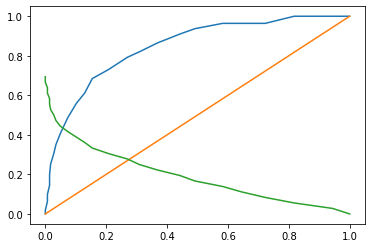

roc curve for Test


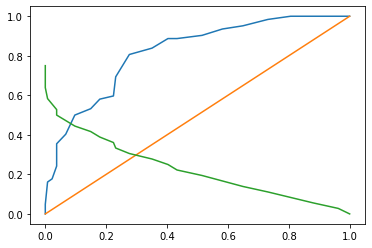

In [80]:
from scipy.stats import randint
params = {
    'n_neighbors': randint(2,40),
    'p': randint(1,5),
}

knnsearch1   = RandomizedSearchCV(knn,params,cv =3,scoring = 'roc_auc',n_jobs =-1,n_iter =100)
knnsearch1.fit(x,y)
knnsearch1.best_params_

knn1 =KNeighborsClassifier(**knnsearch1.best_params_)
knn1.fit(X_train,y_train)
evaluation_train_test(knn1,X_train,y_train,X_test,y_test)



In [ ]:
knn perfoms well with this data.

## naive bayes

In [83]:
from sklearn.naive_bayes import BernoulliNB
nb =BernoulliNB()
nb.fit(xtrainpca,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Train accuracy score for train of BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) : 0.7777777777777778
Test accuracy score for test of  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) : 0.7704081632653061
rou_auc_score for train 0.8134819029555871
rou_auc_score for test 0.7570414058738565
Train classification report 
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.86       285
         1.0       0.66      0.43      0.52       111

    accuracy                           0.78       396
   macro avg       0.73      0.67      0.69       396
weighted avg       0.76      0.78      0.76       396

Test classification report 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       134
         1.0       0.68      0.52      0.59        62

    accuracy                           0.77       196
   macro avg       0.74      0.70      0.71       196
weight

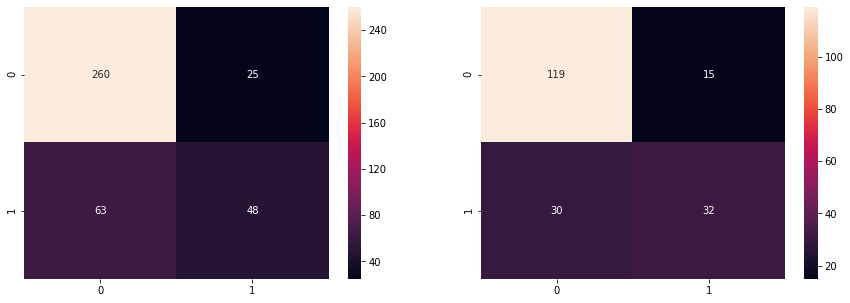

roc curve for Train


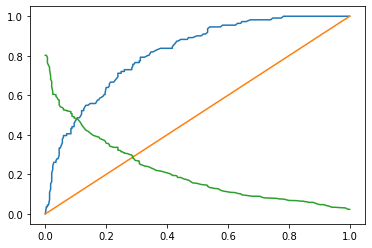

roc curve for Test


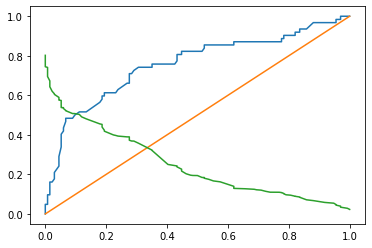

In [84]:
#evaluation_train_test(nb,X_train,y_train,X_test,y_test)
evaluation_train_test(nb,xtrainpca,y_train,xtestpca,y_test)

#evaluation_train_test(lgbcr,xtrainpca,y_train,xtestpca,y_test)

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
ytrainprob =LR.predict_proba(X_train)
ypredict =LR.predict(X_train)

Train accuracy score for train of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.797979797979798
Test accuracy score for test of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.7857142857142857
rou_auc_score for train 0.8649913070965702
rou_auc_score for test 0.8040442946557534
Train classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       285
         1.0    

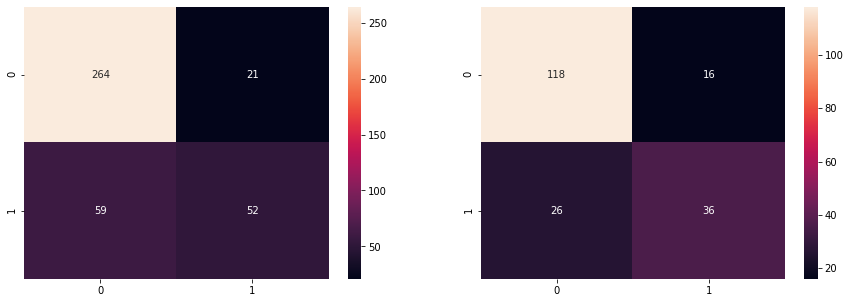

roc curve for Train


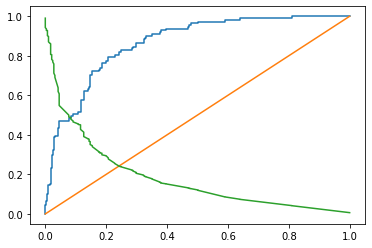

roc curve for Test


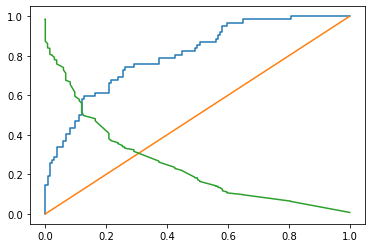

In [87]:
evaluation_train_test(LR,X_train,y_train,X_test,y_test)

## Randomsearch for Logistic Regression

C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Train accuracy score for train of LogisticRegression(C=2.2664058168263006, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.7954545454545454
Test accuracy score for test of  LogisticRegression(C=2.2664058168263006, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) : 0.7857142857142857
rou_auc_score for train 0.8648332543069385
rou_auc_score for test 0.8032017332691382
Train classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.92      

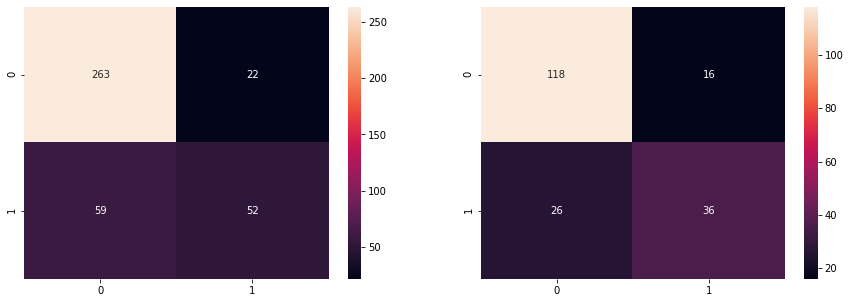

roc curve for Train


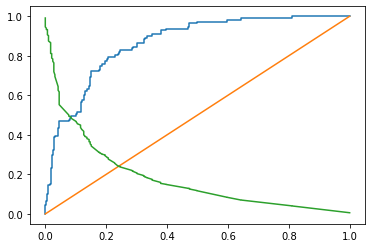

roc curve for Test


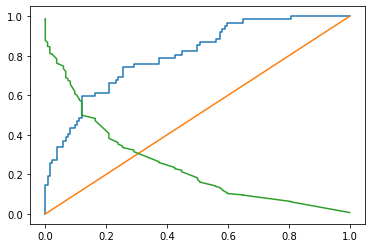

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
rsearch = RandomizedSearchCV(LR, hyperparameters, random_state=0,cv =10,n_iter=100,scoring ='roc_auc',n_jobs =-1)
rsearch.fit(x, y)
par = rsearch.best_params_

LR1 =LogisticRegression(**par)
LR1.fit(X_train,y_train)
evaluation_train_test(LR1,X_train,y_train,X_test,y_test)


here Logistic regression performms well with the data, with train auc score .86 and tets score with .80

In [ ]:
Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship.
Feel free to use charts or graphs to explain. (2 marks)

In [ ]:
from this we can say that our models are predicting well 85% of times in unseen data.

In [90]:
LR1.coef_

array([[ 0.20433088,  1.29696311, -0.30205276,  0.05500593, -0.30070666,
         0.68266387,  0.353018  ,  0.4481882 ]])

In [ ]:
df.

In [92]:
coefdf =pd.DataFrame(LR1.coef_,columns= x.columns)

In [95]:
dd =coefdf.T


In [99]:
sorted_coef =dd.sort_values(by =0,    ascending=False,)
sorted_coef

,0
Glucose,1.296963
BMI,0.682664
Age,0.448188
DiabetesPedigreeFunction,0.353018
Pregnancies,0.204331
SkinThickness,0.055006
Insulin,-0.300707
BloodPressure,-0.302053


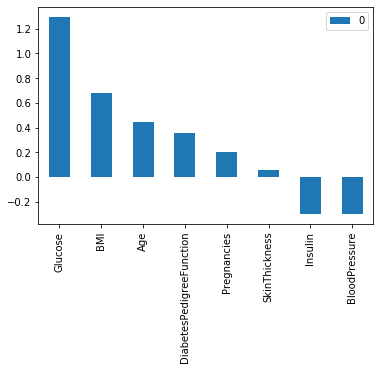

In [103]:
sorted_coef.plot(kind ='bar')

In [ ]:
from this we can say that Glucose ,BMi ,Age are most effecting parameters of daibetics. 